In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
os.chdir('C:\\Users\\user\\OneDrive - mail.shu.edu.tw\\桌面\\Financial Topic\\PY')

In [24]:
df1 = pd.read_excel("1WTI.xlsx")
df2 = pd.read_excel("2CRB.xlsx")
df3 = pd.read_excel("3GPR.xlsx")
df4 = pd.read_excel("4STOCK.xlsx")

## 1. 合併資料

In [25]:
Mgdf = df1
for df in [df2, df3, df4]:
    Mgdf = Mgdf.merge(df,  on=['DATE'], how='inner')  #原始=outer
Mgdf.head(3)

,DATE,WTI,CRB,GPR,STOCK
0,2020-01-03,62.97,197.84,80.794334,431.06
1,2020-01-10,58.99,194.97,167.301392,428.51
2,2020-01-17,58.55,193.71,129.822495,428.11


In [26]:
Mgdf = Mgdf.replace(to_replace=['#DIV/0! ', '#NUM!'], value='', regex=True)
Mgdf.dropna(inplace=True)
Mgdf.to_excel('test0418.xlsx', index=False)
len(Mgdf)

189

In [27]:
df = Mgdf
df

,DATE,WTI,CRB,GPR,STOCK
0,2020-01-03,62.97,197.84,80.794334,431.060
1,2020-01-10,58.99,194.97,167.301392,428.510
2,2020-01-17,58.55,193.71,129.822495,428.110
3,2020-01-31,51.53,180.49,73.977936,435.010
4,2020-02-07,50.29,180.35,78.964661,442.470
...,...,...,...,...,...
204,2024-02-23,79.64,311.94,167.068634,447.163
205,2024-03-01,79.22,319.51,161.151947,448.530
206,2024-03-08,79.81,319.25,178.454819,446.994
207,2024-03-15,82.16,328.85,138.023651,445.042


In [28]:
df.DATE = pd.to_datetime(df.DATE, dayfirst=True)
df = df.set_index("DATE")

In [29]:
df

,WTI,CRB,GPR,STOCK
DATE,,,,
2020-01-03,62.97,197.84,80.794334,431.060
2020-01-10,58.99,194.97,167.301392,428.510
2020-01-17,58.55,193.71,129.822495,428.110
2020-01-31,51.53,180.49,73.977936,435.010
2020-02-07,50.29,180.35,78.964661,442.470
...,...,...,...,...
2024-02-23,79.64,311.94,167.068634,447.163
2024-03-01,79.22,319.51,161.151947,448.530
2024-03-08,79.81,319.25,178.454819,446.994


## 2. ADF Test 

In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, signif=0.10, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic': round(r[0], 4), 'p-value': round(r[1], 4), 'n_lags': round(r[2], 4), 'n_obs': r[3]}
    p_value = output['p-value'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    if verbose:
        print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
        print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
        print(f' Significance Level    = {signif}')
        print(f' Test Statistic        = {output["test_statistic"]}')
        print(f' No. Lags Chosen       = {output["n_lags"]}')

        for key, val in r[4].items():
            print(f' Critical value {adjust(key)} = {round(val, 3)}')

        if p_value <= signif:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")
    
    return p_value <= signif

# Apply ADF test to the WTI, STOCK, and GPR series
adf_results = {
    'WTI': adf_test(df['WTI'], name='WTI', verbose=True),
    'STOCK': adf_test(df['STOCK'], name='STOCK', verbose=True),
    'GPR': adf_test(df['GPR'], name='GPR', verbose=True)
}

adf_results


    Augmented Dickey-Fuller Test on "WTI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -1.7893
 No. Lags Chosen       = 3
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.3858. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "STOCK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -1.9041
 No. Lags Chosen       = 1
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.3301. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.
    Augmented Dickey-Fuller Test on "GPR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

{'WTI': False, 'STOCK': False, 'GPR': True}

In [31]:
df_diff = df.copy()
df_diff['WTI'] = df['WTI'].diff().dropna()
df_diff['STOCK'] = df['STOCK'].diff().dropna()

df_diff = df_diff.dropna()

diff_adf_results = {
    'WTI_diff': adf_test(df_diff['WTI'], name='WTI_diff', verbose=True),
    'STOCK_diff': adf_test(df_diff['STOCK'], name='STOCK_diff', verbose=True)
}

diff_adf_results


    Augmented Dickey-Fuller Test on "WTI_diff" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -6.8473
 No. Lags Chosen       = 2
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
    Augmented Dickey-Fuller Test on "STOCK_diff" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.1
 Test Statistic        = -11.1279
 No. Lags Chosen       = 0
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


{'WTI_diff': True, 'STOCK_diff': True}

## 3. VAR Model

In [49]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fitting VAR model
model = VAR(df_diff[['WTI', 'STOCK', 'GPR']])
results = model.fit(maxlags=15, ic='aic')

# Display the summary of the VAR model
results.summary()


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, Apr, 2024
Time:                     22:47:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    15.3653
Nobs:                     185.000    HQIC:                   15.0547
Log likelihood:          -2130.50    FPE:                2.79514e+06
AIC:                      14.8431    Det(Omega_mle):     2.38679e+06
--------------------------------------------------------------------
Results for equation WTI
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.511271         0.779115            0.656           0.512
L1.WTI          -0.097258         0.073706           -1.320           0.187
L1.STOCK        -0.050492         0.046647           -1.082           0.279
L1.GPR

In [50]:
model.select_order(maxlags=12).summary()

,AIC,BIC,FPE,HQIC
0,15.20,15.25,3.982e+06,15.22
1,14.58,14.79*,2.142e+06,14.66*
2,14.51*,14.89,2.013e+06*,14.67
3,14.52,15.06,2.016e+06,14.74
4,14.56,15.27,2.117e+06,14.85
5,14.60,15.46,2.194e+06,14.95
6,14.67,15.69,2.347e+06,15.08
7,14.71,15.90,2.455e+06,15.19
8,14.76,16.11,2.591e+06,15.31
9,14.83,16.34,2.775e+06,15.44


In [51]:
granger_test_wti = results.test_causality('WTI', ['STOCK', 'GPR'], kind='wald')
granger_test_stock = results.test_causality('STOCK', ['WTI', 'GPR'], kind='wald')
granger_test_gpr = results.test_causality('GPR', ['WTI', 'STOCK'], kind='wald')

# Collect and display the summaries of the Granger causality tests
granger_test_summaries = {
    'WTI caused by STOCK and GPR': granger_test_wti.summary(),
    'STOCK caused by WTI and GPR': granger_test_stock.summary(),
    'GPR caused by WTI and STOCK': granger_test_gpr.summary()
}

granger_test_summaries

{'WTI caused by STOCK and GPR': <class 'statsmodels.iolib.table.SimpleTable'>,
 'STOCK caused by WTI and GPR': <class 'statsmodels.iolib.table.SimpleTable'>,
 'GPR caused by WTI and STOCK': <class 'statsmodels.iolib.table.SimpleTable'>}

In [52]:
granger_test_wti.summary()

Test statistic,Critical value,p-value,df
16.84,12.59,0.010,6


In [53]:
granger_test_stock.summary()

Test statistic,Critical value,p-value,df
6.235,12.59,0.397,6


In [54]:
granger_test_gpr.summary()

Test statistic,Critical value,p-value,df
5.079,12.59,0.534,6


In [55]:
granger_test_wti2 = results.test_causality('WTI', ['STOCK'], kind='wald')
granger_test_wti3 = results.test_causality('WTI', ['GPR'], kind='wald')


# Collect and display the summaries of the Granger causality tests
granger_test_summaries = {
    'WTI caused by STOCK ': granger_test_wti2.summary(),
    'WTI caused by GPR': granger_test_wti3.summary(),

}

granger_test_summaries

{'WTI caused by STOCK ': <class 'statsmodels.iolib.table.SimpleTable'>,
 'WTI caused by GPR': <class 'statsmodels.iolib.table.SimpleTable'>}

In [56]:
granger_test_wti2.summary()

Test statistic,Critical value,p-value,df
2.281,7.815,0.516,3


In [57]:
granger_test_wti3.summary()

Test statistic,Critical value,p-value,df
13.09,7.815,0.004,3


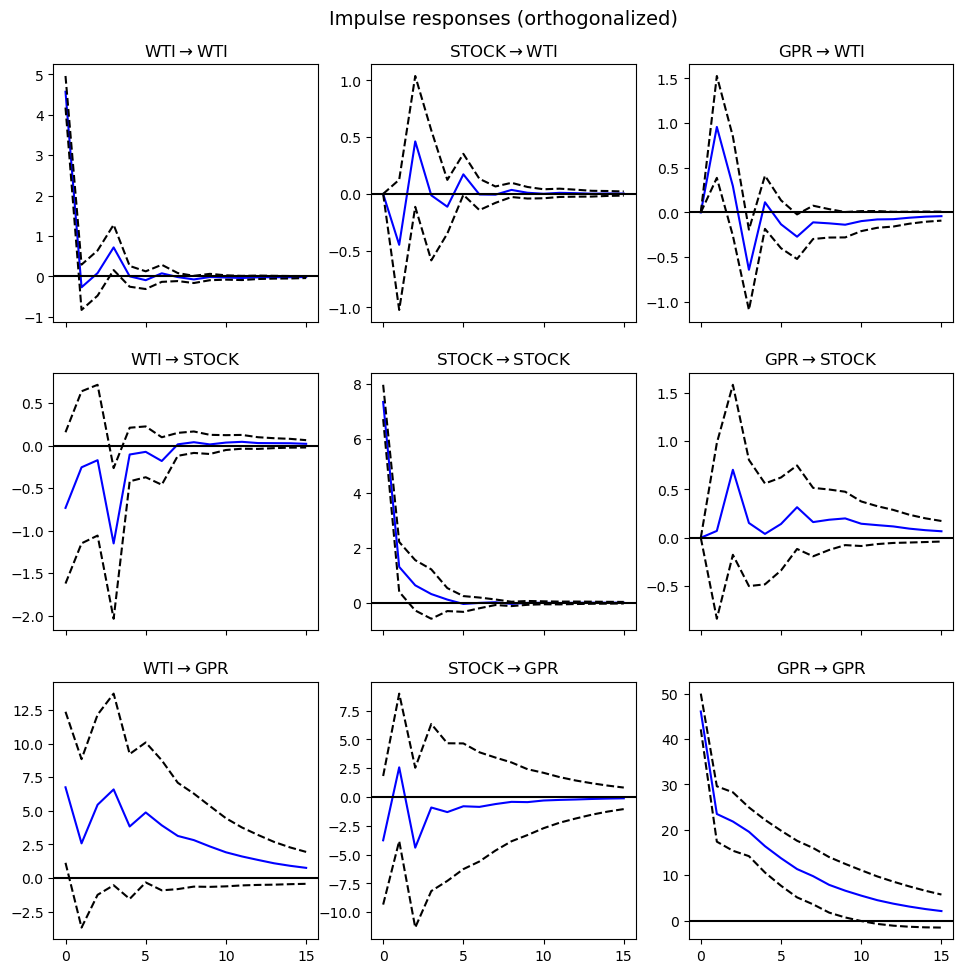

In [58]:
import matplotlib.pyplot as plt

# Computing the impulse response functions from the VAR model results
irf = results.irf(15)  # Compute IRF for 10 periods

# Plotting the impulse response functions
irf_fig = irf.plot(orth=True,signif=0.10)  # Using orthogonalized impulses
plt.show()